# Random Forest

Random Forest
 
Assignment

About the data: <br>
Let’s consider a Company dataset with around 10 variables and 400 records. <br>
The attributes are as follows: <br>
 Sales -- Unit sales (in thousands) at each location<br>
 Competitor Price -- Price charged by competitor at each location<br>
 Income -- Community income level (in thousands of dollars)<br>
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)<br>
 Population -- Population size in region (in thousands)<br>
 Price -- Price company charges for car seats at each site<br>
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site<br>
 Age -- Average age of the local population<br>
 Education -- Education level at each location<br>
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location<br>
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not<br>
The company dataset looks like this: <br>
 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [2]:
data = pd.read_csv('Company_dataRF.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data.shape

(400, 11)

In [4]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
data[data.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [6]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


## Visualisation

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

Text(0.5, 1.0, 'Education')

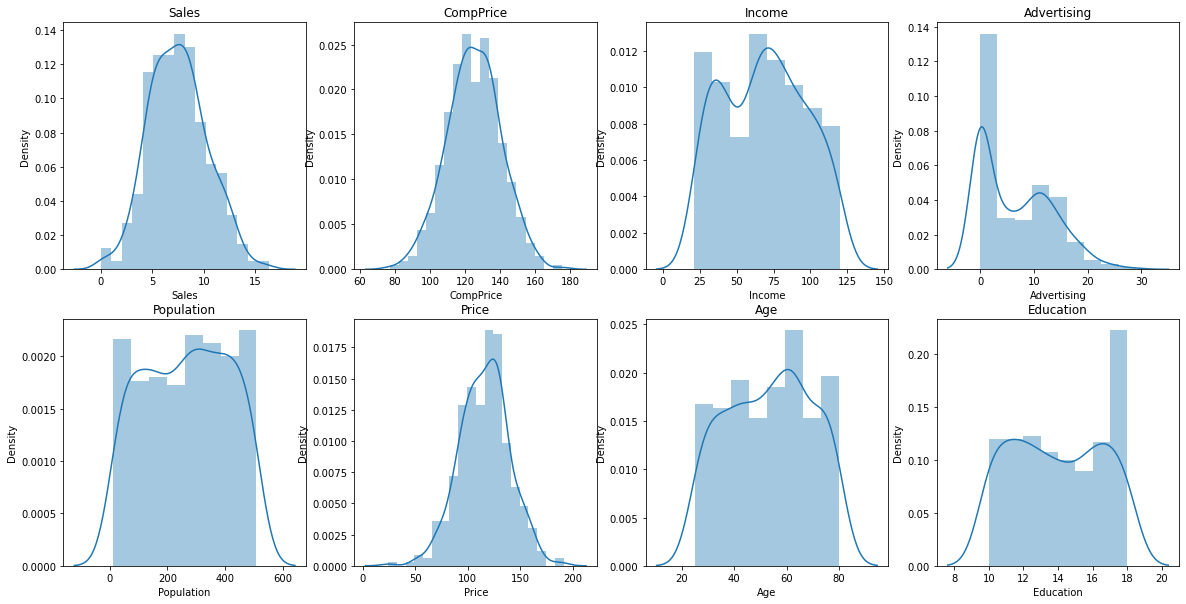

In [8]:
#plotting numeric data to get insights

fig,ax = plt.subplots(2,4, figsize = (20,10))

sns.distplot(data['Sales'],ax = ax[0,0])
sns.distplot(data['CompPrice'],ax = ax[0,1])
sns.distplot(data['Income'],ax = ax[0,2])
sns.distplot(data['Advertising'],ax = ax[0,3])
sns.distplot(data['Population'],ax = ax[1,0])
sns.distplot(data['Price'],ax = ax[1,1])
sns.distplot(data['Age'],ax = ax[1,2])
sns.distplot(data['Education'],ax = ax[1,3])
ax[0,0].set_title("Sales")
ax[0,1].set_title("CompPrice")
ax[0,2].set_title("Income")
ax[0,3].set_title("Advertising")
ax[1,0].set_title("Population")
ax[1,1].set_title("Price")
ax[1,2].set_title("Age")
ax[1,3].set_title("Education")

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'US')

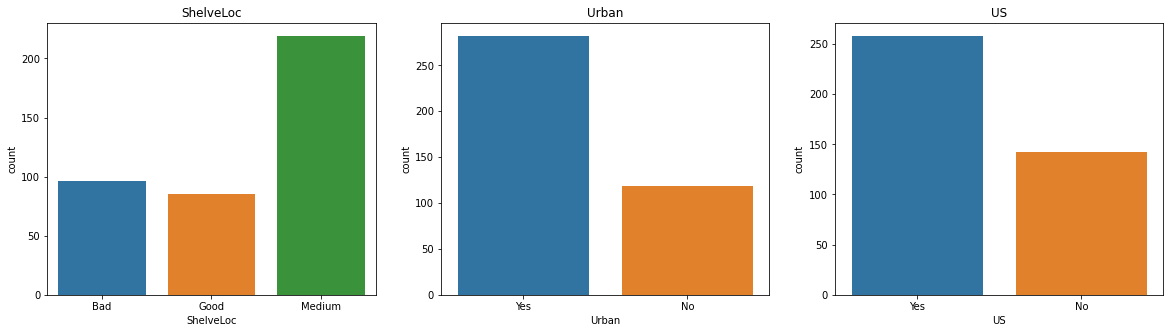

In [10]:
#Countplots for non-numeric data
fig,ax = plt.subplots(1,3, figsize = (20,5))

sns.countplot(data['ShelveLoc'],ax = ax[0])
sns.countplot(data['Urban'],ax = ax[1])
sns.countplot(data['US'],ax = ax[2])
ax[0].set_title('ShelveLoc')
ax[1].set_title('Urban')
ax[2].set_title('US')

In [11]:
#Converting Target variable 'Sales' into categories Low, Medium and High.
data['Sales'] = pd.cut( x = data['Sales'],bins = [0, 6, 12, 17], labels = ['Low','Medium','High'])
data['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


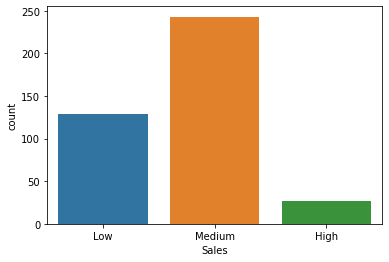

Medium    243
Low       129
High       27
Name: Sales, dtype: int64

In [12]:
#Visualizing categorised Sales data
sns.countplot(data['Sales'])
plt.show()
data["Sales"].value_counts()

In [13]:
#Assigning Positive Numbers for all Categorical Variables/col.
from sklearn.preprocessing import LabelEncoder
data["Sales"] = LabelEncoder().fit_transform(data["Sales"])
data["ShelveLoc"] = LabelEncoder().fit_transform(data["ShelveLoc"])
data["Urban"] = LabelEncoder().fit_transform(data["Urban"])
data["US"] = LabelEncoder().fit_transform(data["US"])
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0


In [14]:
data['Sales'].unique()

array([2, 1, 0, 3])

In [15]:
#splitting independent and dependent variables into X and Y
X = data.iloc[:,1:]
Y = data.iloc[:,0]

## Predictive Power Score

In [17]:
import ppscore as pps

In [18]:
pps.matrix(data)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Sales,Sales,1.000000,predict_itself,True,None,0.0000,1.000000,None
1,Sales,CompPrice,0.000000,regression,True,mean absolute error,12.2150,12.256454,DecisionTreeRegressor()
2,Sales,Income,0.000444,regression,True,mean absolute error,23.6325,23.622001,DecisionTreeRegressor()
3,Sales,Advertising,0.022801,regression,True,mean absolute error,5.7300,5.599349,DecisionTreeRegressor()
4,Sales,Population,0.000000,regression,True,mean absolute error,127.0450,128.268641,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
116,US,ShelveLoc,0.000000,regression,True,mean absolute error,0.6925,0.759865,DecisionTreeRegressor()
117,US,Age,0.000000,regression,True,mean absolute error,13.8775,13.956625,DecisionTreeRegressor()
118,US,Education,0.000000,regression,True,mean absolute error,2.2850,2.304601,DecisionTreeRegressor()
119,US,Urban,0.000000,regression,True,mean absolute error,0.2950,0.416724,DecisionTreeRegressor()


In [19]:
#Assigning Positive Numbers for all Categorical Variables/col.
from sklearn.preprocessing import LabelEncoder
data["Sales"] = LabelEncoder().fit_transform(data["Sales"])
data["ShelveLoc"] = LabelEncoder().fit_transform(data["ShelveLoc"])
data["Urban"] = LabelEncoder().fit_transform(data["Urban"])
data["US"] = LabelEncoder().fit_transform(data["US"])
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0


### Feature Extraction with Recursive Feature Elimination (RFE)

In [20]:
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X = data.drop(["Sales"],axis = 1)
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [21]:
Y = data['Sales']
Y

0      2
1      2
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    2
Name: Sales, Length: 400, dtype: int64

In [22]:
Feature_model = LogisticRegression()
fit = RFE(Feature_model,5).fit(X, Y)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_it

In [23]:
# Feature Ranking:
fit.ranking_

array([1, 1, 2, 6, 1, 1, 3, 1, 5, 4])

In [24]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [25]:
X_feat = X.drop(["Population","Urban"], axis=1)
X_feat.head()

,CompPrice,Income,Advertising,Price,ShelveLoc,Age,Education,US
0,138,73,11,120,0,42,17,1
1,111,48,16,83,1,65,10,1
2,113,35,10,80,2,59,12,1
3,117,100,4,97,2,55,14,1
4,141,64,3,128,0,38,13,0


In [26]:
X1 = X_feat
Y1 = Y

In [27]:
# building random forest classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

num_trees = 350
max_features = 5
kfold = KFold(n_splits = 10)
RF_model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(RF_model, X1, Y1, cv=kfold)
results

array([0.7  , 0.75 , 0.7  , 0.85 , 0.75 , 0.775, 0.8  , 0.875, 0.775,
       0.65 ])

In [28]:
print("Random Forest Model Accuracy:-",round(results.mean(),3)*100,"%")

Random Forest Model Accuracy:- 76.3 %
